<a href="https://colab.research.google.com/github/raksdayal1/DataDrivenAerospaceEngg/blob/main/ModifiedDMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description: This is the version provided by Dr.Kara and modified to fix the error introduced**

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
#Define the functions
def f1(xx, tt):
    y_1 = 2 * np.cos(xx) * np.exp(1j * tt)
    return y_1

def f2(xx, tt):
    y_2 = np.sin(xx) * np.exp(3j * tt)
    return y_2

In [104]:
#Define time and space discretizations
xi = np.linspace(-10, 10, 400)
t = np.linspace(0, 4*np.pi, 201)
dt = t[1] - t[0]
xx, tt = np.meshgrid(xi, t)
X = f1(xx, tt) + f2(xx, tt)

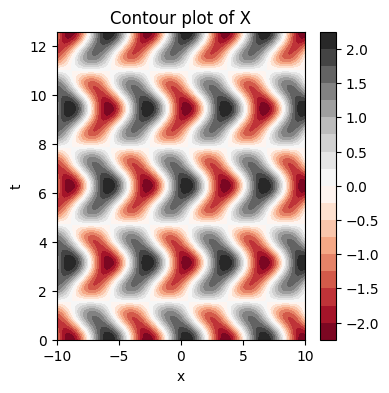

In [105]:
plt.figure(figsize=(4, 4))
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')
plt.show()


In [106]:
#plt.figure(figsize=(6, 4))
#plt.contourf(tt.T, xx.T, np.real(X.T), 20, cmap='RdGy')
#plt.colorbar()
#plt.xlabel('t')
#plt.ylabel('x')
#plt.title('Contour plot of X')
#plt.show()

In [107]:
X_1 = X.T[:, :-1]
X_2 = X.T[:, 1:]


In [108]:
# Step 1 - SVD
U, Sigma, Vh = np.linalg.svd(X_1,full_matrices=False)
print(f"Ushape = {U.shape}, sigma shape = {Sigma.shape}, Vh shape = {Vh.shape}")


Ushape = (400, 200), sigma shape = (200,), Vh shape = (200, 200)


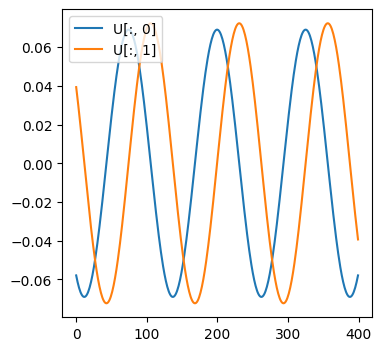

In [109]:

plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
#plt.plot(U[:, 2], label='U[:, 2]')
#plt.plot(U[:, 3], label='U[:, 3]')
plt.legend(loc='upper left')
plt.show()


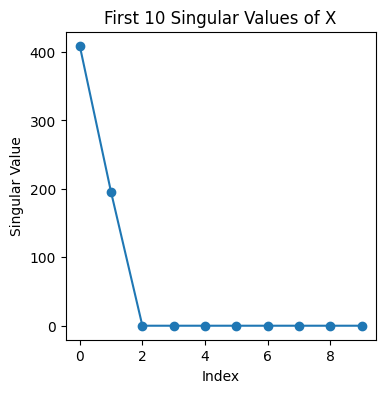

In [110]:
plt.figure(figsize=(4, 4))
plt.plot(Sigma[:10], 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [111]:
#print(Sigma[:4])


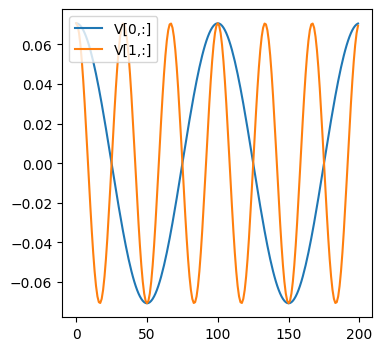

In [112]:
plt.figure(figsize=(4, 4))
plt.plot(Vh[0,:], label='V[0,:]')
plt.plot(Vh[1,:], label='V[1,:]')
#plt.plot(V[2,:], label='V[2,:]')
#plt.plot(V[3,:], label='V[3,:]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

In [113]:
n_modes = 2
U, Sigma, Vh = U[:, :n_modes], Sigma[:n_modes], Vh[:n_modes, :]
print(f"Modes reduction: Ushape = {U.shape}, sigma shape = {Sigma.shape}, Vh shape = {Vh.shape}")
print(F"X_prime shape = {X_2.shape}")

Modes reduction: Ushape = (400, 2), sigma shape = (2,), Vh shape = (2, 200)
X_prime shape = (400, 200)


In [114]:
#print(U[:2,:2])


In [115]:
A_tilde = np.conjugate(U.T) @ X_2 @ np.conjugate(Vh.T) @ np.linalg.inv(np.diag(Sigma))
Lambda, W = np.linalg.eig(A_tilde)

In [116]:
Phi = X_2 @ np.conjugate(Vh.T) @  np.linalg.inv(np.diag(Sigma)) @ W

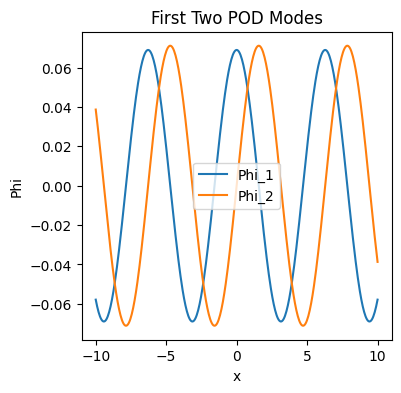

In [117]:
plt.figure(figsize=(4, 4))
plt.plot(xi, Phi[:, 0], '-', label='Phi_1')
plt.plot(xi, Phi[:, 1], '-', label='Phi_2')
plt.xlabel('x')
plt.ylabel('Phi')
plt.legend()
plt.title('First Two POD Modes')
plt.show()

In [118]:
b_full, residuals, rank, sigma = np.linalg.lstsq(Phi, X_1, rcond=None)

In [119]:
b = b_full[:,0] # get the first column of amplitude modes matrix


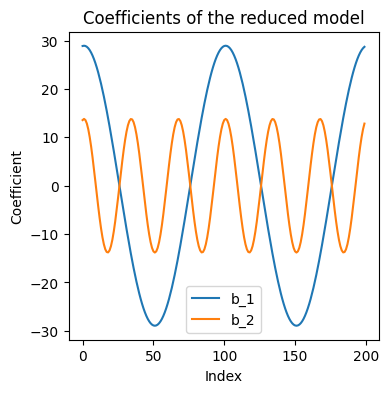

In [120]:
plt.figure(figsize=(4, 4))
plt.plot(b_full[0], '-', label='b_1')
plt.plot(b_full[1], '-', label='b_2')
plt.xlabel('Index')
plt.ylabel('Coefficient')
plt.legend()
plt.title('Coefficients of the reduced model')
plt.show()

In [121]:
Omega = np.log(Lambda)/dt


In [122]:
Time = t[:-1].reshape((-1,t[:-1].shape[0]))
Omega = Omega.reshape((-1,Omega.shape[0]))
T_omega = np.exp(Omega.T @ Time)
t_exp = np.squeeze(Time)

dynamics = np.diag(b) @ T_omega
print(f"shape of dynamics = {dynamics.shape}")


shape of dynamics = (2, 200)


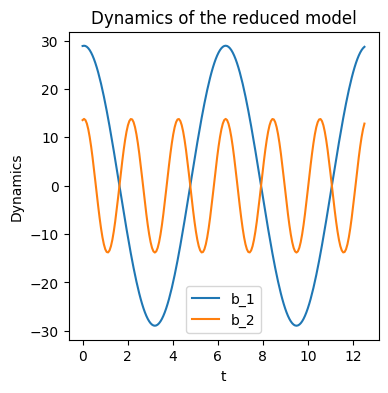

In [123]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='b_1')
plt.plot(t_exp, dynamics[1, :], '-', label='b_2')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [124]:
X_dmd = Phi @ dynamics
print(f"Shape of XDMD = {X_dmd.shape}, {X.shape}")


Shape of XDMD = (400, 200), (201, 400)


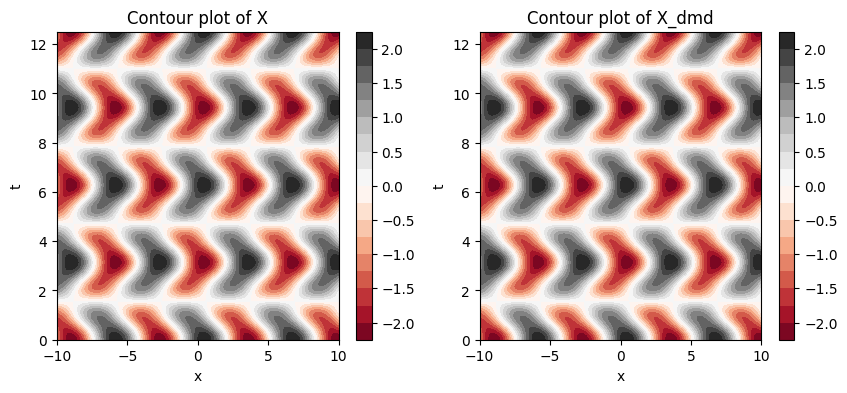

In [127]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.contourf(xx[:-1], tt[:-1], np.real(X_1.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1,2,2)
plt.contourf(xx[:-1], tt[:-1], np.real(X_dmd.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X_dmd')
plt.show()



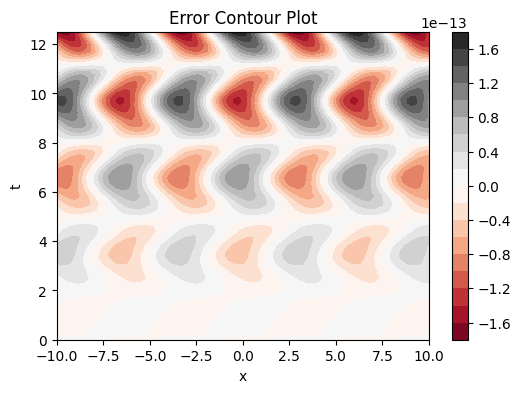

In [126]:
plt.figure(figsize=(6, 4))
plt.contourf(xx[:-1], tt[:-1], np.real(X_1.T-X_dmd.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Error Contour Plot')
plt.show()